In [1]:
!pip install scikit-learn --upgrade


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

# Load the CSV file into a pandas DataFrame
df_pois = pd.read_csv(r"C:\Users\Redmi\Desktop\mmcs_project\edinburgh_pois.csv")

df_pois.info()
df_pois.head()

print(f"\n--- POI Categorys Distribution ---")
print(df_pois['category'].value_counts())

print(f"\n--- Statistics on POI Names ---")
print(df_pois['name'].value_counts().head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33669 entries, 0 to 33668
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      409 non-null    object 
 1   geometry  33669 non-null  object 
 2   lat       33669 non-null  float64
 3   lon       33669 non-null  float64
 4   category  33669 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.3+ MB

--- POI Categorys Distribution ---
category
residential    32837
commercial       551
school           188
library           49
university        28
hospital          16
Name: count, dtype: int64

--- Statistics on POI Names ---
name
St David's RC Primary School         2
Mannafields Christian School         2
Findlay House                        1
Wester Hailes Library                1
Pirniehall Primary School            1
Corstorphine Library                 1
Fettes College Preparatory School    1
Dalkeith High School                 1
Adam Smith's Panmure

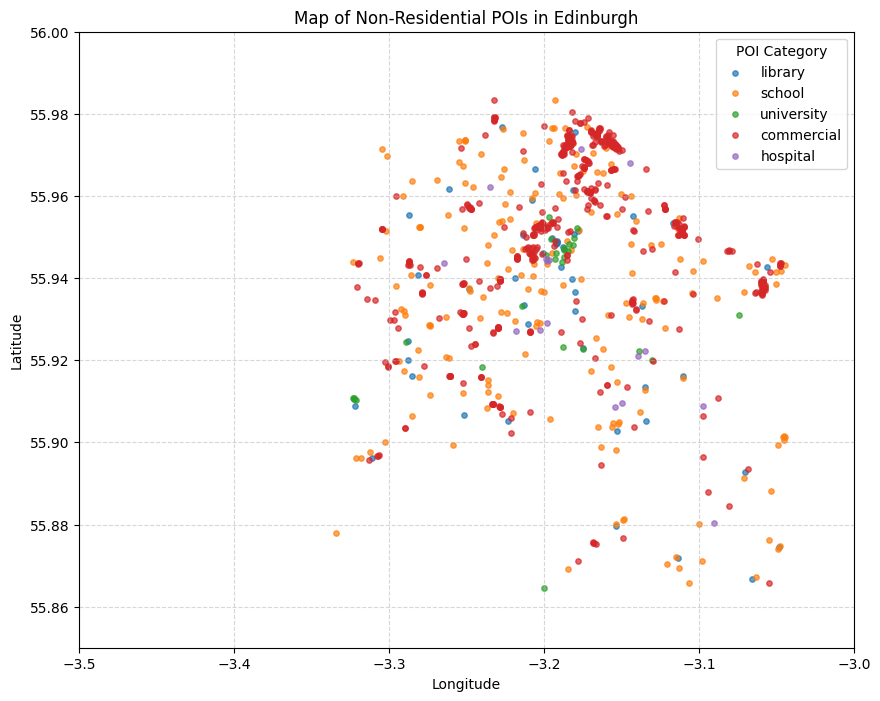

In [3]:
# Non-Residential POIs (Scatter Plot) ---
df_non_residential = df_pois[df_pois['category'] != 'residential']

plt.figure(figsize=(10, 8))
# We will loop through each category to plot them with different colors and create a legend
categories = df_non_residential['category'].unique()

for category in categories:
    subset = df_non_residential[df_non_residential['category'] == category]
    plt.scatter(subset['lon'], subset['lat'], label=category, alpha=0.7, s=15) # s=15 is marker size

plt.title('Map of Non-Residential POIs in Edinburgh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='POI Category')
plt.grid(True, linestyle='--', alpha=0.5)
# Set consistent map boundaries for Edinburgh
plt.xlim(-3.5, -3.0)
plt.ylim(55.85, 56.0)

plt.show()

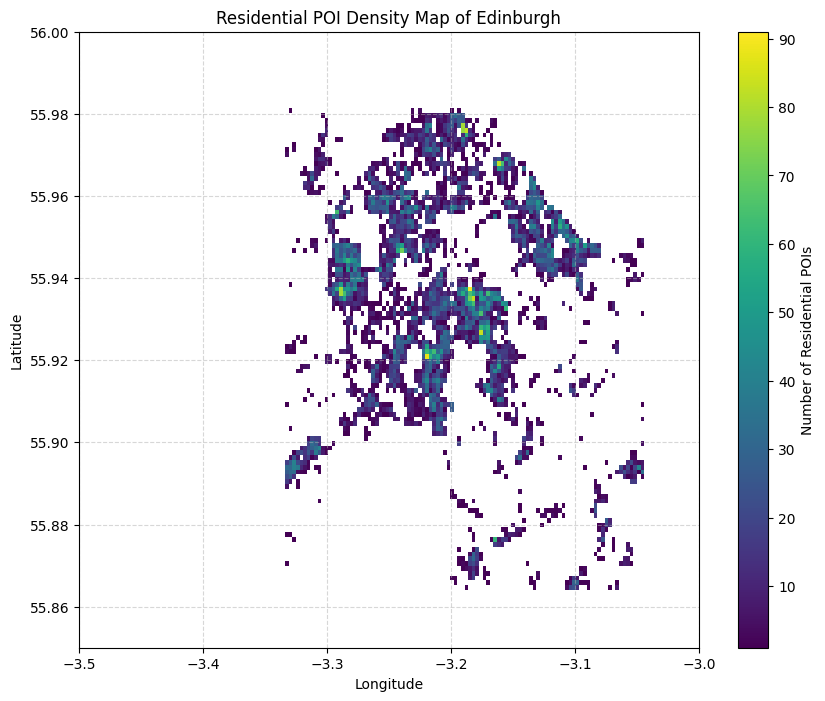

In [4]:
# Plot 2: Residential POI Density (Heatmap/2D Histogram) ---
df_residential = df_pois[df_pois['category'] == 'residential']

plt.figure(figsize=(10, 8))
# Use hist2d to create a 2D histogram (heatmap)
# Bins=100 will create a 100x100 grid
plt.hist2d(df_residential['lon'], df_residential['lat'], bins=100, cmap='viridis', cmin=1) 
# cmin=1 means cells with 0 count are not colored

plt.title('Residential POI Density Map of Edinburgh')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
# Add a color bar to show the density scale
plt.colorbar(label='Number of Residential POIs')
# Set consistent map boundaries
plt.xlim(-3.5, -3.0)
plt.ylim(55.85, 56.0)

plt.show()

Total residential POIs: 32837
Total non-residential POIs: 832
Running K-Means for Residential (K=50)...
Running K-Means for Non_Residential (K=20)...


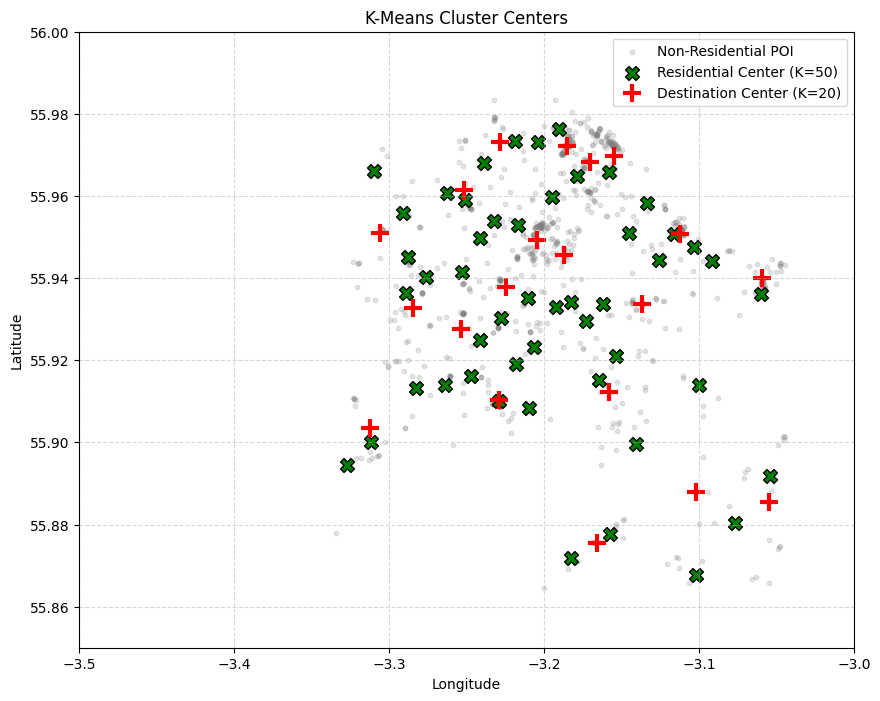

In [5]:
df_residential = df_pois[df_pois['category'] == 'residential'][['lon', 'lat']].copy()
df_non_residential = df_pois[df_pois['category'] != 'residential'][['lon', 'lat']].copy()

print(f"Total residential POIs: {len(df_residential)}")
print(f"Total non-residential POIs: {len(df_non_residential)}")

# Define Cluster Numbers (K) ---
K_RESIDENTIAL = 50
K_DESTINATION = 20

# Run K-Means for Residential ---
print(f"Running K-Means for Residential (K={K_RESIDENTIAL})...")
kmeans_res = KMeans(n_clusters=K_RESIDENTIAL, random_state=42, n_init=10)
kmeans_res.fit(df_residential[['lon', 'lat']])
centroids_res = kmeans_res.cluster_centers_

# Convert centroids to a DataFrame
df_centroids_res = pd.DataFrame(centroids_res, columns=['lon', 'lat'])
df_centroids_res['type'] = 'Residential Center'

# Run K-Means for Non-Residential
print(f"Running K-Means for Non_Residential (K={K_DESTINATION})...")
kmeans_dest = KMeans(n_clusters=K_DESTINATION, random_state=42, n_init=10)
kmeans_dest.fit(df_non_residential[['lon', 'lat']])
centroids_dest = kmeans_dest.cluster_centers_

df_centroids_dest = pd.DataFrame(centroids_dest, columns=['lon', 'lat'])
df_centroids_dest['type'] = 'Non_Residential Center'

df_candidate_locations = pd.concat([df_centroids_res, df_centroids_dest], ignore_index=True)
df_candidate_locations.to_csv('candidate_locations.csv', index=False)

# Visualize the Results with Matplotlib
plt.figure(figsize=(10, 8))

# Plot background POIs (non-residential only, for clarity)
plt.scatter(df_non_residential['lon'], df_non_residential['lat'], c='gray', alpha=0.2, s=10, label='Non-Residential POI')

# Plot the new centroids
plt.scatter(df_centroids_res['lon'], df_centroids_res['lat'], 
            c='green', marker='X', s=100, label=f'Residential Center (K={K_RESIDENTIAL})', edgecolors='black')
            
plt.scatter(df_centroids_dest['lon'], df_centroids_dest['lat'], 
            c='red', marker='+', s=150, label=f'Destination Center (K={K_DESTINATION})', linewidths=3)

# Setup the plot
plt.title('K-Means Cluster Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(-3.5, -3.0)
plt.ylim(55.85, 56.0)

plt.show()

In [6]:
df_stations = pd.read_csv(r"C:\Users\Redmi\Desktop\mmcs_project\station_data.csv")

df_stations.info()
df_stations.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   station_id   85 non-null     int64  
 1   name         85 non-null     object 
 2   address      85 non-null     object 
 3   rental_uris  85 non-null     object 
 4   lat          85 non-null     float64
 5   lon          85 non-null     float64
 6   capacity     85 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.8+ KB


,station_id,name,address,rental_uris,lat,lon,capacity
0,2268,Picardy Place,Picady Place,{'android': 'edinburghcyclehire://stations/226...,55.956535,-3.186248,31
1,2265,Musselburgh Brunton Hall,Bridge St,{'android': 'edinburghcyclehire://stations/226...,55.943961,-3.058307,29
2,2263,Musselburgh Lidl,Musselborough North High Street opposite Harbo...,{'android': 'edinburghcyclehire://stations/226...,55.943880,-3.066754,34
3,2259,Leith Walk North,165 Leith Walk,{'android': 'edinburghcyclehire://stations/225...,55.967918,-3.173586,32
4,1824,Duke Street,"Duke St, Edinburgh EH6 8HU",{'android': 'edinburghcyclehire://stations/182...,55.969012,-3.167395,43


In [7]:
df_candidates = pd.read_csv(r"C:\Users\Redmi\Desktop\mmcs_project\candidate_locations.csv")

df_candidates.info()
df_candidates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lon     70 non-null     float64
 1   lat     70 non-null     float64
 2   type    70 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


,lon,lat,type
0,-3.217913,55.919124,Residential Center
1,-3.103012,55.947515,Residential Center
2,-3.287357,55.945204,Residential Center
3,-3.182698,55.934180,Residential Center
4,-3.218554,55.973324,Residential Center


(55.85, 56.0)

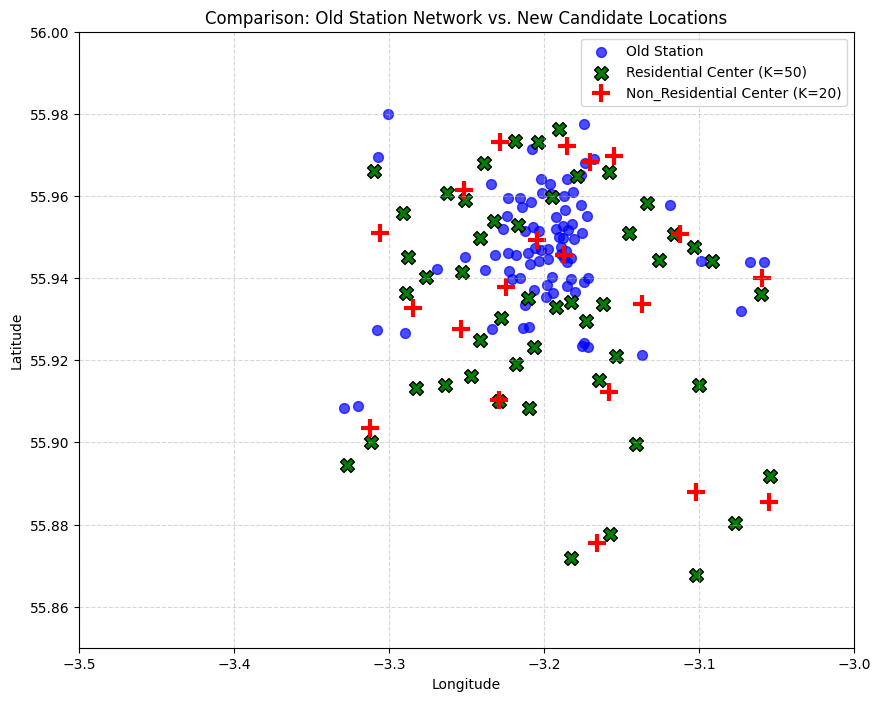

In [8]:
plt.figure(figsize=(10, 8))
# Old station 
plt.scatter(df_stations['lon'], df_stations['lat'],  
            c='blue',          
            marker='o',        
            s=50,              
            label='Old Station', 
            alpha=0.7)         

# Residential Centre
plt.scatter(df_centroids_res['lon'], df_centroids_res['lat'], 
            c='green',        
            marker='X',        
            s=100,             
            label=f'Residential Center (K=50)', 
            edgecolors='black')

# Non-residential district centre
plt.scatter(df_centroids_dest['lon'], df_centroids_dest['lat'],
            c='red',           
            marker='+',      
            s=150,         
            label=f'Non_Residential Center (K=20)',
            linewidths=3)     

plt.title('Comparison: Old Station Network vs. New Candidate Locations') 
plt.xlabel('Longitude')
plt.ylabel('Latitude')  
plt.legend()            
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xlim(-3.5, -3.0)
plt.ylim(55.85, 56.0)

In [9]:
import os
print("cwd =", os.getcwd())
print("Here has:", os.listdir("."))


cwd = c:\Users\Redmi\Desktop
Here has: ['.c9', '.Rhistory', '.vscode', 'AML Group Project (1).py', 'AML_Group_Project_merged.py', 'anacode', 'Anaconda Navigator.lnk', 'AndrowsData', 'APA格式.pdf', 'biomarkers_project', 'candidate_locations.csv', 'cluster_features.png', 'code', 'Computer', 'counts-data(2).zip', 'counts-data-cleaned-all.zip', 'counts-data.zip', 'Course Descriptions_20250702.pdf', 'CR3.py', 'CR4.py', 'cyclehire-data.zip', 'desktop.ini', 'Doubao.lnk', 'e', 'edinburgh_pois_clean.csv', 'evening_commute_imbalance.png', 'feature_comparison.png', 'Figure_1预测.png', 'Grammarly.lnk', 'homework stack 3.pdf', 'ipas code.R', 'latest AML Group Project.py', 'lunchtime_imbalance.png', 'MMCS 25-26 Problem Statement.pdf', 'mmcs code.ipynb', 'mmcs.py', 'mmcs02 new(2).ipynb', 'mmcs02 new.ipynb', 'mmcs_project', 'MMCS_Project.ipynb', 'mmcs_project.zip', 'morning_commute_imbalance.png', 'Postcode_level_all_meters_electricity_2023.csv', 'predicted_artists_2025.csv', 'project-1-Victoria83-code', 

In [10]:
import glob 
import os    
import time  

data_folder = r"C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata"
all_csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

print(f"Starting process... Looking for files in '{data_folder}' folder...")

all_csv_files = glob.glob(os.path.join(data_folder, "*.csv"))

if not all_csv_files:
    print(f"Error: No .csv files found in '{data_folder}'.")
    print("Please make sure you have unzipped all .csv files into that subfolder.")
else:
    print(f"Success! Found {len(all_csv_files)} .csv files. Ready to proceed to the next cell.")

Starting process... Looking for files in 'C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata' folder...
Success! Found 36 .csv files. Ready to proceed to the next cell.


In [11]:
list_of_monthly_data = []

print("Starting to loop through all files... (This may take a few minutes)")
start_time = time.time()

for filename in all_csv_files:
    print(f"  Processing: {filename} ...")
    try:
        # We only load the 'started_at' column
        df_month = pd.read_csv(filename, usecols=['started_at'])

        df_month['started_at_dt'] = pd.to_datetime(df_month['started_at'], format='ISO8601')
        
        # Extract hour (0-23)
        df_month['hour_of_day'] = df_month['started_at_dt'].dt.hour
        
        # Extract day of week (Monday=0, Sunday=6)
        df_month['day_of_week'] = df_month['started_at_dt'].dt.dayofweek
        
        # Map day of week to 'Weekday' or 'Weekend'
        day_type_map = {
            0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 
            3: 'Weekday', 4: 'Weekday',
            5: 'Weekend', 6: 'Weekend'
        }
        df_month['day_type'] = df_month['day_of_week'].map(day_type_map)
        
        # Keep only the columns we need
        processed_data = df_month[['day_type', 'hour_of_day']]
        
        # Add the processed data for this month to our list
        list_of_monthly_data.append(processed_data)
        
    except Exception as e:
        print(f"    Warning: Skipping file {filename} (Error: {e})")

Starting to loop through all files... (This may take a few minutes)
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2018_10.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2018_11.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2018_12.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_01.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_02.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_03.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_04.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_05.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_06.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_07.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\20

In [12]:
print("Length =", len(list_of_monthly_data))
print(list_of_monthly_data)


Length = 36
[     day_type  hour_of_day
0     Weekday            1
1     Weekday            4
2     Weekday            4
3     Weekday            4
4     Weekday            5
...       ...          ...
3906  Weekday           20
3907  Weekday           21
3908  Weekday           22
3909  Weekday           22
3910  Weekday           23

[3911 rows x 2 columns],      day_type  hour_of_day
0     Weekday            2
1     Weekday            3
2     Weekday            8
3     Weekday            8
4     Weekday            8
...       ...          ...
4151  Weekday           23
4152  Weekday           23
4153  Weekday           23
4154  Weekday           23
4155  Weekday           23

[4156 rows x 2 columns],      day_type  hour_of_day
0     Weekend            0
1     Weekend            0
2     Weekend            1
3     Weekend            3
4     Weekend            3
...       ...          ...
3849  Weekday           20
3850  Weekday           21
3851  Weekday           21
3852  Weekday    

In [13]:
import pandas as pd
# Combine
combined_df = pd.concat(list_of_monthly_data, ignore_index=True)

# Aggregate
print("Aggregating 3-year total data.")
# Group by 'day_type' and 'hour_of_day' and get the size (count) of each group
total_hourly_counts = combined_df.groupby(['day_type', 'hour_of_day']).size().reset_index(name='trip_count')

# Separate the 'Weekday' and 'Weekend' data for plotting
weekday_counts = total_hourly_counts[total_hourly_counts['day_type'] == 'Weekday'].set_index('hour_of_day')['trip_count']
weekend_counts = total_hourly_counts[total_hourly_counts['day_type'] == 'Weekend'].set_index('hour_of_day')['trip_count']

# Reindex to ensure all 24 hours (0-23) are present, filling missing hours with 0
all_hours = range(0, 24)
weekday_counts = weekday_counts.reindex(all_hours, fill_value=0)
weekend_counts = weekend_counts.reindex(all_hours, fill_value=0)

Aggregating 3-year total data.


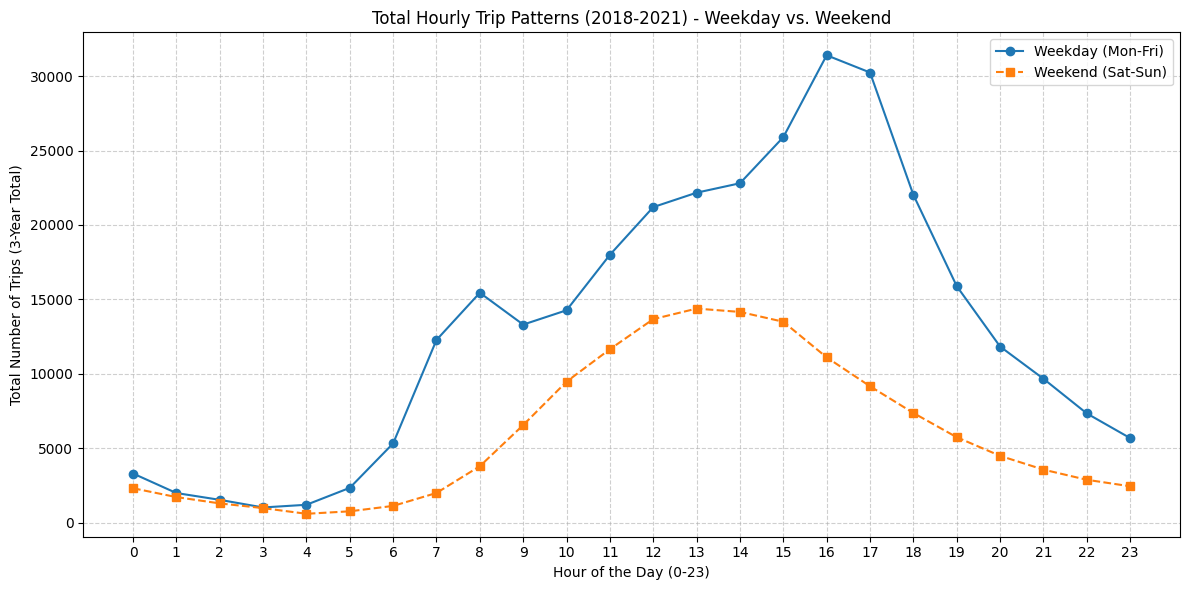

In [14]:
import matplotlib.pyplot as plt

# 如果在 Jupyter 里想直接在下面显示图：
%matplotlib inline


plt.figure(figsize=(12, 6))

# Plot Weekday data
plt.plot(weekday_counts.index, weekday_counts.values, 
         marker='o', linestyle='-', label='Weekday (Mon-Fri)')

# Plot Weekend data
plt.plot(weekend_counts.index, weekend_counts.values, 
         marker='s', linestyle='--', label='Weekend (Sat-Sun)')

plt.title('Total Hourly Trip Patterns (2018-2021) - Weekday vs. Weekend')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Total Number of Trips (3-Year Total)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


In [15]:
list_of_monthly_data_od = []

start_time = time.time()

data_folder = "cyclehire-cleandata" 

for filename in all_csv_files:
    print(f"  Processing: {filename} ...")
    try:
        # We now load the three columns needed for O-D analysis
        df_month = pd.read_csv(filename, usecols=[
            'started_at', 
            'start_station_id', 
            'end_station_id'
        ])

        df_month['started_at_dt'] = pd.to_datetime(df_month['started_at'], format='ISO8601')
        df_month['hour_of_day'] = df_month['started_at_dt'].dt.hour
        df_month['day_of_week'] = df_month['started_at_dt'].dt.dayofweek
        
        day_type_map = {
            0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 
            3: 'Weekday', 4: 'Weekday',
            5: 'Weekend', 6: 'Weekend'
        }
        df_month['day_type'] = df_month['day_of_week'].map(day_type_map)
        
        # Keep only the columns we need
        processed_data = df_month[[
            'day_type', 
            'hour_of_day', 
            'start_station_id', 
            'end_station_id'
        ]]
        
        list_of_monthly_data_od.append(processed_data)
        
    except Exception as e:
        print(f"    Warning: Skipping file {filename} (Error: {e})")

  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2018_10.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2018_11.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2018_12.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_01.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_02.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_03.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_04.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_05.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_06.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_07.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cyclehire-cleandata\2019_08.csv ...
  Processing: C:\Users\Redmi\Desktop\mmcs_project\cycl

In [16]:
combined_df_od = pd.concat(list_of_monthly_data_od, ignore_index=True)

print(f"Combine complete! Total trips processed: {len(combined_df_od)}.")

Combine complete! Total trips processed: 460655.


Loading 'station_data.csv'...
Helper function 'analyze_and_plot_imbalance' is now defined.

--- Starting Analysis for: Weekday [7, 8, 9] ---
Filtering for 'Weekday' and hours [7, 8, 9]...
Found 41016 trips.

--- Top 5 'Full' Stations (Weekday [7, 8, 9]) ---
                name  net_imbalance
77     Victoria Quay           1516
73  Kings Building 3           1364
74  Kings Building 2           1230
64    Castle Terrace            937
65     Castle Street            653

--- Top 5 'Empty' Stations (Weekday [7, 8, 9]) ---
                 name  net_imbalance
66       Meadows East           -942
58     Dundee Terrace           -908
67      Pollock Halls           -899
20  Bruntsfield Links           -842
59       Meadow Place           -561
Chart successfully saved to: morning_commute_imbalance.png

--- Starting Analysis for: Weekday [16, 17] ---
Filtering for 'Weekday' and hours [16, 17]...
Found 61649 trips.

--- Top 5 'Full' Stations (Weekday [16, 17]) ---
                       name  

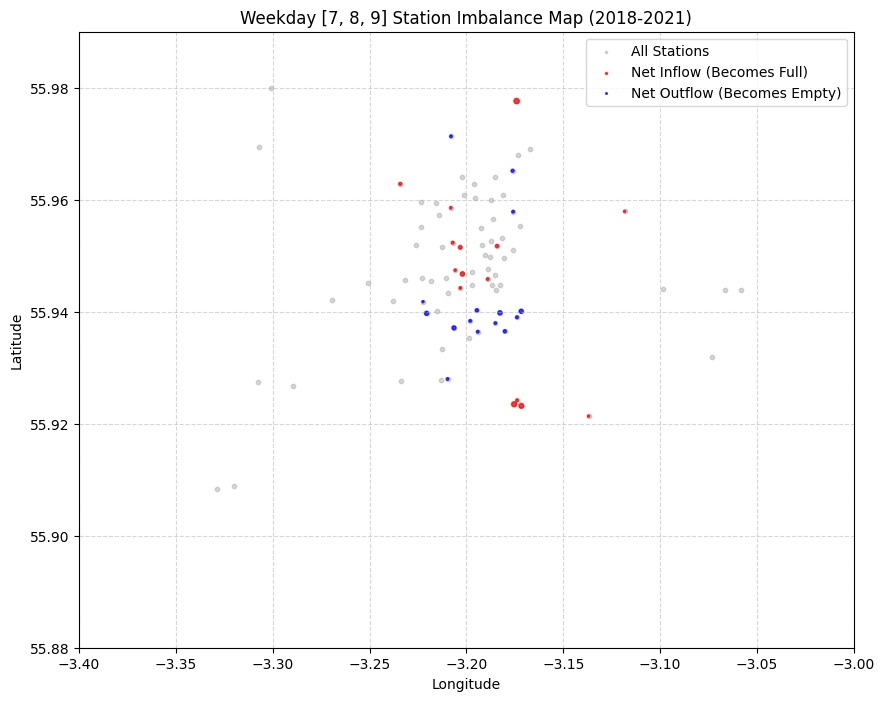

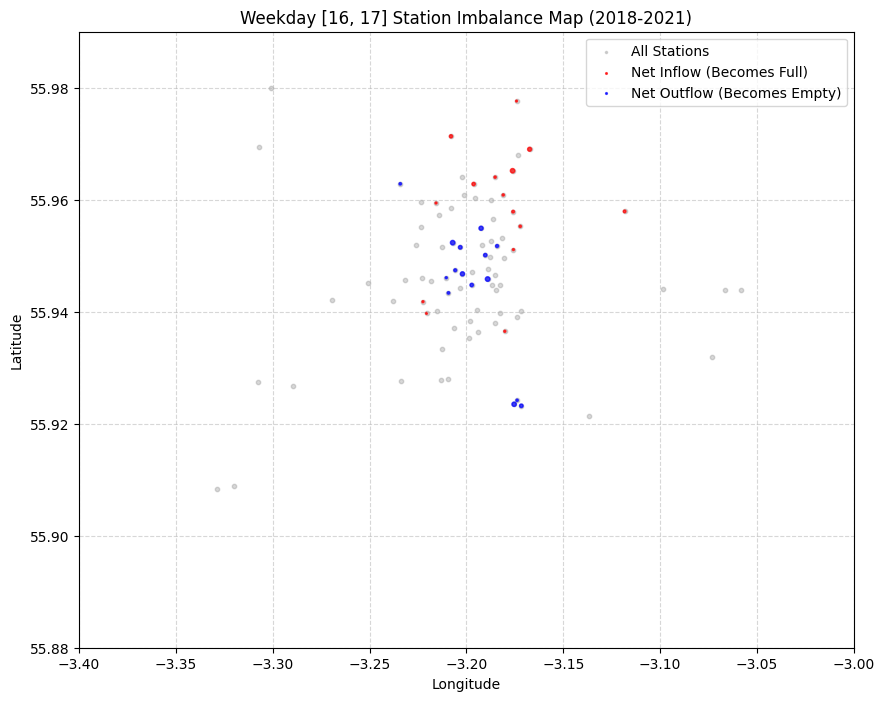

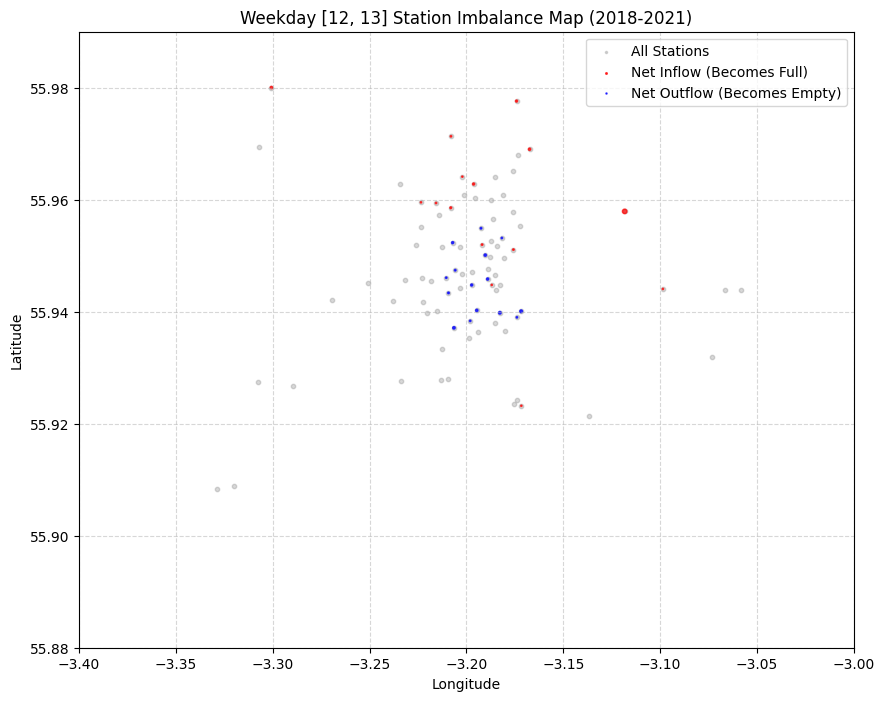

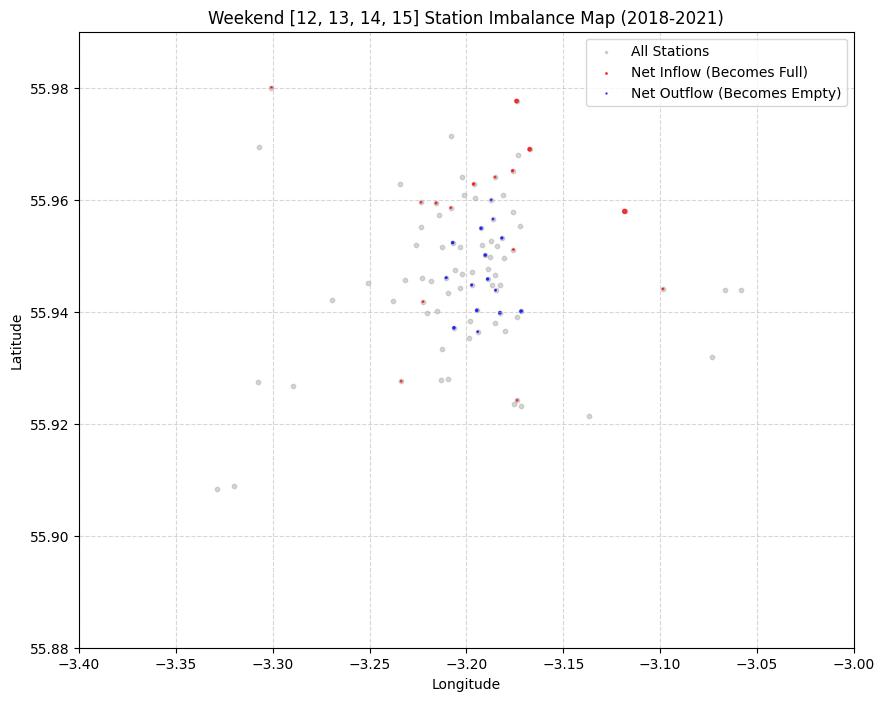

In [17]:


if 'stations_df' not in locals():
    print("Loading 'station_data.csv'...")
    try:
        stations_df = pd.read_csv(
            r"C:\Users\Redmi\Desktop\mmcs_project\station_data.csv"
        )
    except FileNotFoundError:
        print("Error: 'station_data.csv' not found. Cannot proceed.")
        stations_df = pd.DataFrame(columns=['station_id', 'name', 'lat', 'lon'])


# This function contains the entire analysis
def analyze_and_plot_imbalance(combined_df, stations_df, day_type, hour_list, filename):
    
    title_prefix = f"{day_type} {hour_list}"
    print(f"\n--- Starting Analysis for: {title_prefix} ---")

    print(f"Filtering for '{day_type}' and hours {hour_list}...")
    filtered_df = combined_df[
        (combined_df['day_type'] == day_type) &
        (combined_df['hour_of_day'].isin(hour_list))
    ].copy()
    
    print(f"Found {len(filtered_df)} trips.")
    if len(filtered_df) == 0:
        print("Warning: No trips found for this period. Skipping plot.")
        return

    outflow = filtered_df.groupby('start_station_id').size().reset_index(name='total_outflow')

    inflow = filtered_df.groupby('end_station_id').size().reset_index(name='total_inflow')

    imbalance_df = stations_df.merge(
        outflow, left_on='station_id', right_on='start_station_id', how='left'
    ).merge(
        inflow, left_on='station_id', right_on='end_station_id', how='left'
    )
    
    imbalance_df = imbalance_df[['station_id', 'name', 'lat', 'lon', 'total_outflow', 'total_inflow']]
    imbalance_df = imbalance_df.fillna(0)

    imbalance_df['net_imbalance'] = imbalance_df['total_inflow'] - imbalance_df['total_outflow']
    imbalance_df = imbalance_df.sort_values(by='net_imbalance', ascending=False)

    print(f"\n--- Top 5 'Full' Stations ({title_prefix}) ---")
    print(imbalance_df.head(5)[['name', 'net_imbalance']])
    
    print(f"\n--- Top 5 'Empty' Stations ({title_prefix}) ---")
    print(imbalance_df.tail(5).sort_values(by='net_imbalance', ascending=True)[['name', 'net_imbalance']])

    
    top_full = imbalance_df.head(15)
    top_empty = imbalance_df.tail(15)

    plt.figure(figsize=(10, 8))
    plt.scatter(stations_df['lon'], stations_df['lat'], c='gray', alpha=0.3, s=10, label='All Stations')
    
    # Plot 'Becoming Full' stations (Red)
    plt.scatter(
        top_full['lon'], top_full['lat'], 
        c='red', 
        # Note: You may need to adjust the bubble size scaling (e.g., / 50 or / 200)
        s=top_full['net_imbalance'].apply(lambda x: max(1, x / 100)),
        label='Net Inflow (Becomes Full)', 
        alpha=0.7
    )
    
    # Plot 'Becoming Empty' stations (Blue)
    plt.scatter(
        top_empty['lon'], top_empty['lat'], 
        c='blue', 
        s=abs(top_empty['net_imbalance']).apply(lambda x: max(1, x / 100)),
        label='Net Outflow (Becomes Empty)', 
        alpha=0.7
    )
    
    plt.title(f"{title_prefix} Station Imbalance Map (2018-2021)")
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc='best', markerscale=0.5)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xlim(-3.4, -3.0)
    plt.ylim(55.88, 55.99)
    
    plt.savefig(filename)
    print(f"Chart successfully saved to: {filename}")

print("Helper function 'analyze_and_plot_imbalance' is now defined.")


if 'combined_df_od' in locals():
    
    # Morning Peak (Weekday) ---
    MORNING_HOURS = [7, 8, 9]
    analyze_and_plot_imbalance(
        combined_df_od,        
        stations_df,           
        'Weekday',             
        MORNING_HOURS,         
        'morning_commute_imbalance.png'
    )

    # Evening Peak (Weekday) ---
    EVENING_HOURS = [16, 17]
    analyze_and_plot_imbalance(
        combined_df_od, 
        stations_df,
        'Weekday', 
        EVENING_HOURS, 
        'evening_commute_imbalance.png'
    )

    # --- Analysis 3: Lunchtime (Weekday) ---
    LUNCH_HOURS = [12, 13]
    analyze_and_plot_imbalance(
        combined_df_od, 
        stations_df, 
        'Weekday', 
        LUNCH_HOURS, 
        'lunchtime_imbalance.png'
    )

    # --- Analysis 4: Weekend Peak (Weekend) ---
    WEEKEND_PEAK_HOURS = [12, 13, 14, 15]
    analyze_and_plot_imbalance(
        combined_df_od, 
        stations_df, 
        'Weekend', 
        WEEKEND_PEAK_HOURS, 
        'weekend_peak_imbalance.png'
    )

In [ ]:
# --- Cell 0: Path setup ---
from pathlib import Path
import pandas as pd
import glob

# Project root folder
BASE_DIR = Path(r"C:\Users\Redmi\Desktop\mmcs_project")

# Input paths
COUNTS_DIR = BASE_DIR / "counts-data"       
STATION_CSV = BASE_DIR / "station_data.csv" 
OUTPUT_DEMAND = BASE_DIR / "demand_nodes.csv"  

# Check existence
print("Base:", BASE_DIR)
print("Counts folder exists:", COUNTS_DIR.exists())
print("Station CSV exists:", STATION_CSV.exists())


Base: C:\Users\Redmi\Desktop\mmcs_project
Counts folder exists: True
Station CSV exists: True


In [19]:
# --- Cell 1: Read all monthly count CSVs ---
# Read the counts files for all months and concatenate them.
csv_files = sorted(glob.glob(str(COUNTS_DIR / "*_counts.csv")))
print(f"Found {len(csv_files)} monthly files.")

# Read and concatenate
dfs = [pd.read_csv(f) for f in csv_files]
counts = pd.concat(dfs, ignore_index=True)

print("Counts shape:", counts.shape)
counts.head()


Found 36 monthly files.
Counts shape: (268488, 4)


,start_station_id,end_station_id,hour,trip_count
0,171,171,9.0,1
1,171,171,10.0,2
2,171,171,11.0,1
3,171,171,12.0,4
4,171,171,13.0,2


In [20]:
# --- Cell 2: Aggregate to total demand weight per station ---
# Calculate the number of times each station appears as a starting point and destination, then sum to obtain the total demand intensity weight.
# This indicates the magnitude of user demand for that station.
# Sum outgoing trips by start_station_id
start_nodes = (
    counts.groupby(["start_station_id"], as_index=False)["trip_count"]
    .sum()
    .rename(columns={"start_station_id": "node_id", "trip_count": "start_weight"})
)

# Sum incoming trips by end_station_id
end_nodes = (
    counts.groupby(["end_station_id"], as_index=False)["trip_count"]
    .sum()
    .rename(columns={"end_station_id": "node_id", "trip_count": "end_weight"})
)

# Merge start + end demand
node_weights = pd.merge(start_nodes, end_nodes, on="node_id", how="outer").fillna(0.0)
node_weights["weight"] = node_weights["start_weight"] + node_weights["end_weight"]
node_weights = node_weights[["node_id", "weight"]].sort_values("weight", ascending=False)

print("Node weights (top 5):")
node_weights.head()


Node weights (top 5):


,node_id,weight
23,265,34271.0
137,1728,31133.0
9,250,27615.0
21,262,22273.0
99,1024,21845.0


In [21]:
# --- Cell 3: Join with station coordinates ---
# Merge latitude and longitude coordinates
# Merge coordinates from station_data.csv into each demand node;
# Automatically delete points with missing coordinates (e.g., where old stations have been removed).
stations = pd.read_csv(STATION_CSV)

# Auto-detect id, lon, lat column names
col_id = [c for c in stations.columns if str(c).lower() in ["station_id", "id"]][0]
lon_col = [c for c in stations.columns if "lon" in str(c).lower() or "long" in str(c).lower()][0]
lat_col = [c for c in stations.columns if "lat" in str(c).lower()][0]

stations_keep = stations[[col_id, lon_col, lat_col]].drop_duplicates()
stations_keep.columns = ["node_id", "lon", "lat"]

# Merge coordinates
demand_nodes = pd.merge(node_weights, stations_keep, on="node_id", how="left")
missing = demand_nodes["lon"].isna().sum()
print(f"Nodes missing coordinates: {missing}")
if missing > 0:
    demand_nodes = demand_nodes.dropna(subset=["lon", "lat"]).reset_index(drop=True)

demand_nodes = demand_nodes[["node_id", "lon", "lat", "weight"]]
demand_nodes.head()


Nodes missing coordinates: 113


,node_id,lon,lat,weight
0,265,-3.182739,55.939809,34271.0
1,1728,-3.118332,55.957915,31133.0
2,250,-3.174126,55.977617,27615.0
3,262,-3.196284,55.962804,22273.0
4,1024,-3.194640,55.940238,21845.0


In [22]:
# --- Cell 4: Save output file ---
demand_nodes.to_csv(OUTPUT_DEMAND, index=False)
demand_nodes.head()


,node_id,lon,lat,weight
0,265,-3.182739,55.939809,34271.0
1,1728,-3.118332,55.957915,31133.0
2,250,-3.174126,55.977617,27615.0
3,262,-3.196284,55.962804,22273.0
4,1024,-3.194640,55.940238,21845.0


In [23]:
#part2
#MCLP Maximum Coverage Location Model (Xpress)
# --- Cell 0: Model paths & parameters ---
import xpress as xp
import pandas as pd
from pathlib import Path
import math
import matplotlib.pyplot as plt

# Project paths
BASE_DIR = Path(r"C:\Users\Redmi\Desktop\mmcs_project")
DATA_DIR = BASE_DIR
OUT_DIR  = BASE_DIR / "outputs/mclp_run1"

# Input files
CAND_FILE   = DATA_DIR / "candidate_locations.csv"
DEMAND_FILE = DATA_DIR / "demand_nodes.csv"

# Parameters
RADIUS_M = 500     # coverage radius in meters
BUDGET = 3000000        # use if you have fixed_cost column
MAX_SITES = 80       # max number of stations to select

OUT_DIR.mkdir(parents=True, exist_ok=True)
print("Paths set.")


Paths set.


In [24]:
# --- Cell 1: Haversine distance ---
# R denotes the Earth's radius, used to calculate the true distance between two latitude and longitude points.
# MCLP employs this to determine "which sites can cover which demand points".
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great-circle distance between two GPS coordinates (meters).
    """
    R = 6371000.0  # Earth's radius in meters
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    dphi = math.radians(lat2 - lat1)
    dlmb = math.radians(lon2 - lon1)
    a = math.sin(dphi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(dlmb/2)**2
    return 2 * R * math.asin(math.sqrt(a))


In [25]:
# --- Cell 2: Build neighbor sets ---
# Identify candidate stations within 500 metres of each demand point, storing results in a dictionary structure: N[i] = [s1, s2, ...].
def build_neighbors(demand_df, cand_df, radius_m=500):
    """
    For each demand node i, find candidate stations s within radius_m meters.
    Return dict N[i] = [list of candidate indices].
    """
    N = {}
    for i, di in demand_df.iterrows():
        neigh = []
        for s, cs in cand_df.iterrows():
            d = haversine(di["lon"], di["lat"], cs["lon"], cs["lat"])
            if d <= radius_m:
                neigh.append(s)
        N[i] = neigh
    return N


In [26]:
# --- Cell 3: Load data and check coverage ---
# Data Loading and Adjacency Checking
cand = pd.read_csv(CAND_FILE)
dem  = pd.read_csv(DEMAND_FILE)

# Add default cost/weight if missing
if "fixed_cost" not in cand.columns:
    cand["fixed_cost"] = 1.0
if "weight" not in dem.columns:
    dem["weight"] = 1.0

N = build_neighbors(dem, cand, radius_m=RADIUS_M)
no_cover = sum(1 for i in dem.index if len(N[i]) == 0)
print(f"Demand nodes not covered by any candidate (within {RADIUS_M}m): {no_cover}")


Demand nodes not covered by any candidate (within 500m): 47


In [27]:
# --- Cell 4: Build MCLP model ---
# Model Construction
m = xp.problem("MCLP")

# Decision variables
# Decision variables
x = {s: xp.var(vartype=xp.binary, name=f"x_{int(s)}") 
     for s in cand.index}
z = {i: xp.var(vartype=xp.binary, name=f"z_{int(i)}")  
     for i in dem.index}
m.addVariable(list(x.values()) + list(z.values()))


# Objective: maximize covered demand weight
m.setObjective(xp.Sum(dem.loc[i,"weight"] * z[i] for i in dem.index), sense=xp.maximize)

# Cover constraints
for i in dem.index:
    if len(N[i]) == 0:
        m.addConstraint(z[i] <= 0)
    else:
        m.addConstraint(z[i] <= xp.Sum(x[s] for s in N[i]))

# Budget or number of sites constraint
if BUDGET is not None:
    m.addConstraint(xp.Sum(cand.loc[s,"fixed_cost"]*x[s] for s in cand.index) <= float(BUDGET))
if MAX_SITES is not None:
    m.addConstraint(xp.Sum(x[s] for s in cand.index) <= int(MAX_SITES))

print("Model built with", len(x), "x-vars and", len(z), "z-vars.")


Model built with 70 x-vars and 85 z-vars.


C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\3026519679.py:3: LicenseWarning: Using the license file found in your Xpress installation. If you want to use this license and no longer want to see this message, use the following code before using the xpress module:
  xpress.init('C:/xpressmp//bin/xpauth.xpr')
  m = xp.problem("MCLP")
C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\3026519679.py:7: DeprecationWarning: Deprecated in Xpress 9.5: create a linked variable by calling problem.addVariable()
  x = {s: xp.var(vartype=xp.binary, name=f"x_{int(s)}")
C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\3026519679.py:9: DeprecationWarning: Deprecated in Xpress 9.5: create a linked variable by calling problem.addVariable()
  z = {i: xp.var(vartype=xp.binary, name=f"z_{int(i)}")


In [28]:
# --- Cell 5: Solve model ---
m.setControl({"miprelstop": 1e-6, "treememorylimit": 512})
m.solve()

status = m.getProbStatusString()
objval = m.getObjVal()
print(f"Solve status: {status}")
print(f"Objective (covered demand weight): {objval:.2f}")

# Extract results
cand["x"] = [m.getSolution(x[s]) for s in cand.index]
dem["z"]  = [m.getSolution(z[i]) for i in dem.index]

cand.to_csv(OUT_DIR / "candidates_with_x.csv", index=False)
dem.to_csv(OUT_DIR / "demand_with_z.csv", index=False)
cand[cand["x"]>0.5].to_csv(OUT_DIR / "chosen_sites.csv", index=False)
dem[dem["z"]<0.5].to_csv(OUT_DIR / "uncovered_nodes.csv", index=False)

print("Results saved to:", OUT_DIR)


FICO Xpress v9.7.0, Hyper, solve started 13:44:49, Nov 21, 2025
Heap usage: 457KB (peak 457KB, 86KB system)
Maximizing MILP noname using up to 12 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
TREEMEMORYLIMIT = 512
MIPRELSTOP = 1.e-6
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
        87 rows          155 cols          265 elements       155 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 1632KB (peak 1669KB, 85KB system)
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  315033.00   .0000000
                        
------- optimal --------
Concurrent statistics:
           Dual: 0 simplex iterations, 0.00s
Optimal solution found
 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0       315033.0000  

C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\3562108387.py:5: DeprecationWarning: Deprecated in Xpress 9.5: use problem.attributes.solvestatus and problem.attributes.solstatus instead
  status = m.getProbStatusString()
C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\3562108387.py:6: DeprecationWarning: Deprecated in Xpress 9.5: use problem.attributes.objval instead
  objval = m.getObjVal()


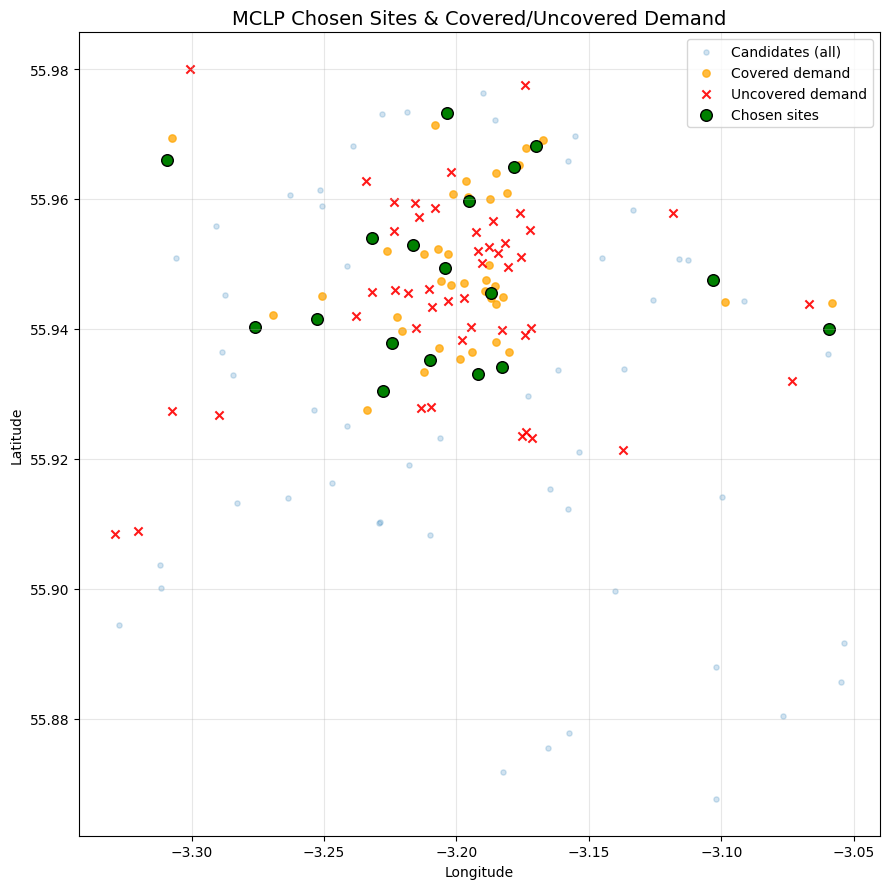

In [29]:
# === Plot MCLP result: Candidates + Covered demand + Uncovered demand + Chosen sites ===
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- Paths ---
BASE = Path(r"C:\Users\Redmi\Desktop\mmcs_project")
OUT_DIR = BASE / "outputs/mclp_run1"

# --- Read final Xpress solution results ---
cand = pd.read_csv(OUT_DIR / "candidates_with_x.csv")  # must include columns: cand_id, lon, lat, x
dem  = pd.read_csv(OUT_DIR / "demand_with_z.csv")      # must include columns: node_id, lon, lat, weight, z

# --- Build masks for demand nodes ---
covered    = dem["z"] > 0.5   # covered demand nodes
uncovered  = dem["z"] <= 0.5  # uncovered demand nodes

plt.figure(figsize=(9, 9))

# 1) All candidate sites
plt.scatter(cand["lon"], cand["lat"],
            s=14, alpha=0.20,
            label="Candidates (all)")

# 2) Covered demand nodes
plt.scatter(dem.loc[covered, "lon"], dem.loc[covered, "lat"],
            s=28, alpha=0.75, color="orange",
            label="Covered demand")

# 3) Uncovered demand nodes
plt.scatter(dem.loc[uncovered, "lon"], dem.loc[uncovered, "lat"],
            s=35, alpha=0.90, marker="x", color="red",
            label="Uncovered demand")

# 4) Chosen station locations
chosen = cand["x"] > 0.5
plt.scatter(cand.loc[chosen, "lon"], cand.loc[chosen, "lat"],
            s=70, marker="o", color="green", edgecolors="black",
            label="Chosen sites")

plt.title("MCLP Chosen Sites & Covered/Uncovered Demand", fontsize=14)
plt.xlabel("Longitude"); 
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# ============================================================
# Part 3: Capacity Allocation Model (LP)  **Revised Edition**
# Allocate berths among selected sites to maximise the demand served within the constraints of total berth capacity and budget.
# ============================================================

import xpress as xp
import pandas as pd
import math
from pathlib import Path

# ----------------- Path configuration -----------------
BASE = Path(r"C:\Users\Redmi\Desktop\mmcs_project")
OUT_DIR = BASE / "outputs/mclp_run1"

# Read in MCLP results
cand = pd.read_csv(OUT_DIR / "candidates_with_x.csv")   # At least include: lon, lat, type, fixed_cost, x
dem  = pd.read_csv(OUT_DIR / "demand_with_z.csv")       # At least include: node_id, lon, lat, weight

# Retain only sites selected by MCLP
chosen = cand[cand["x"] > 0.5].copy()
chosen = chosen.reset_index().rename(columns={"index": "site_id"})
print("Chosen sites =", len(chosen))

# ----------------- Parameter Zone -----------------
TOTAL_DOCKS    = 500          # Maximum total number of berths
DOCK_COST      = 5000         # Cost per berth (£)
COUNCIL_BUDGET = 3000000        # Budget ceiling (£)
RADIUS_M       = 500           # Coverage radius (metres)

# Key: Automatically calculate the SERVICE_PER_DOCK based on total demand and the number of berths.
total_demand = dem["weight"].sum()
TARGET_COVERAGE = 0.9          # It is hoped that, in theory, 90% of demand can be covered by the total berth capacity.

SERVICE_PER_DOCK = total_demand * TARGET_COVERAGE / TOTAL_DOCKS
print(f"Total demand = {total_demand:.1f}")
print(f"Auto SERVICE_PER_DOCK ≈ {SERVICE_PER_DOCK:.1f} (demand units per dock)")

# ----------------- Haversine distance -----------------
def haversine_m(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2.0)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2.0)**2
    c = 2*math.asin(math.sqrt(a))
    return 6371000 * c

# ----------------- Adjacency relationships: Which selected sites are located near each requirement point -----------------
neighbors = {i: [] for i in dem.index}

for i, di in dem.iterrows():
    for s, cs in chosen.iterrows():
        if haversine_m(di["lon"], di["lat"], cs["lon"], cs["lat"]) <= RADIUS_M:
            neighbors[i].append(s)

# Check how many demand points have absolutely no neighbouring sites.
num_isolated = sum(1 for i in dem.index if len(neighbors[i]) == 0)
print("Demand nodes with NO nearby chosen station:", num_isolated)


m = xp.problem("Capacity_Allocation_Rewrite")

# docks variable: Number of berths at each selected site (integer)
docks = {
    s: xp.var(vartype=xp.integer, lb=0, name=f"docks_{int(chosen.loc[s, 'site_id'])}")
    for s in chosen.index
}

# Served variable: The 'demand volume' served per demand point (continuous)
served = {
    i: xp.var(lb=0,
              ub=float(dem.loc[i, "weight"]), 
              name=f"served_{int(dem.loc[i, 'node_id'])}")
    for i in dem.index
}

m.addVariable(list(docks.values()) + list(served.values()))

# Objective: Maximise the total demand served
m.setObjective(xp.Sum(served[i] for i in dem.index), sense=xp.maximize)

# Constraint 1: Demand must not exceed the sum of its own demand quantity and capacity constraints.
for i in dem.index:
    Ns = neighbors[i]
    if len(Ns) == 0:
        # No stations nearby; service unavailable
        m.addConstraint(served[i] <= 0)
    else:
        # Number of vehicles served ≤ Capacity per parking space × Total number of parking spaces at nearby sites
        m.addConstraint(
            served[i] <= SERVICE_PER_DOCK * xp.Sum(docks[s] for s in Ns)
        )

# Constraint 2: Total berths ≤ Upper limit
m.addConstraint(xp.Sum(docks[s] for s in chosen.index) <= TOTAL_DOCKS)

# Constraint 3: Budget constraint (Dock_cost * sum docks ≤ Budget)
m.addConstraint(
    xp.Sum(DOCK_COST * docks[s] for s in chosen.index) <= COUNCIL_BUDGET
)

# （If you wish to prevent all parking spaces from being concentrated at a few sites, you may impose a cap per site, such as 30 spaces.）
MAX_DOCKS_PER_SITE = 30
for s in chosen.index:
    m.addConstraint(docks[s] <= MAX_DOCKS_PER_SITE)

# ----------------- Solve -----------------
m.solve()
print("Status:", m.getProbStatus())
print("Objective value (total served demand) =", m.getObjVal())

# ----------------- Retrieve solution & save results -----------------
# 1) Served at the demand node level
served_vars = [served[i] for i in dem.index]
served_vals = m.getSolution(served_vars)

dem_eval = dem.copy()
dem_eval["served"] = served_vals
dem_eval["served_ratio"] = dem_eval["served"] / dem_eval["weight"].replace(0, float("nan"))

# 2) Site-level docks
dock_vars = [docks[s] for s in chosen.index]
dock_vals = m.getSolution(dock_vars)

rows = []
for s, d in zip(chosen.index, dock_vals):
    site_id = int(chosen.loc[s, "site_id"])
    lon     = chosen.loc[s, "lon"]
    lat     = chosen.loc[s, "lat"]
    cost    = DOCK_COST * d
    rows.append({
        "site_id": site_id,
        "lon": lon,
        "lat": lat,
        "docks": d,
        "cost": cost
    })
    print(f"Site {site_id:3d}: docks = {d:5.0f}, cost = £{cost:8.2f}")

capacity_df = pd.DataFrame(rows)
cap_path = OUT_DIR / "capacity_results_rewrite.csv"
capacity_df.to_csv(cap_path, index=False)
print("Saved new capacity allocation to:", cap_path)

# 3) Print the overall KPIs to quickly assess whether this SERVICE_PER_DOCK figure is reasonable.
total_served = dem_eval["served"].sum()
overall_ratio = total_served / total_demand if total_demand > 0 else float("nan")

print("\n===== New Demand satisfaction KPIs =====")
print(f"Total demand weight = {total_demand:,.1f}")
print(f"Total served weight = {total_served:,.1f}")
print(f"Overall served ratio = {overall_ratio:.3f}")

# 4) Berth and Budget Utilisation
total_docks_alloc = sum(dock_vals)
budget_used = DOCK_COST * total_docks_alloc
print("\n===== New Budget & capacity usage =====")
print(f"Total docks allocated = {total_docks_alloc:,.1f} (limit = {TOTAL_DOCKS})")
print(f"Budget used (GBP)     = £{budget_used:,.1f} (limit = £{COUNCIL_BUDGET:,.1f})")


Chosen sites = 18
Total demand = 745054.0
Auto SERVICE_PER_DOCK ≈ 1341.1 (demand units per dock)
Demand nodes with NO nearby chosen station: 47
FICO Xpress v9.7.0, Hyper, solve started 13:44:50, Nov 21, 2025
Heap usage: 439KB (peak 439KB, 91KB system)
Maximizing MILP noname using up to 12 threads and up to 15GB memory, with these control settings:
OUTPUTLOG = 1
NLPPOSTSOLVE = 1
XSLP_DELETIONCONTROL = 0
XSLP_OBJSENSE = -1
Original problem has:
       105 rows          103 cols          178 elements        18 entities
Presolved problem has:
         0 rows            0 cols            0 elements         0 entities
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 1585KB (peak 1614KB, 91KB system)
Will try to keep branch and bound tree memory usage below 7.3GB
Starting concurrent solve with dual (1 thread)

 Concurrent-Solve,   0s
            Dual        
    objective   dual inf
 D  315033.00   .0000000
                        
------- optimal --------
Concurrent statist

C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\4023220611.py:65: DeprecationWarning: Deprecated in Xpress 9.5: create a linked variable by calling problem.addVariable()
  s: xp.var(vartype=xp.integer, lb=0, name=f"docks_{int(chosen.loc[s, 'site_id'])}")
C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\4023220611.py:71: DeprecationWarning: Deprecated in Xpress 9.5: create a linked variable by calling problem.addVariable()
  i: xp.var(lb=0,
C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\4023220611.py:109: DeprecationWarning: Deprecated in Xpress 9.5: use problem.attributes.solvestatus and problem.attributes.solstatus instead
  print("Status:", m.getProbStatus())
C:\Users\Redmi\AppData\Local\Temp\ipykernel_17888\4023220611.py:110: DeprecationWarning: Deprecated in Xpress 9.5: use problem.attributes.objval instead
  print("Objective value (total served demand) =", m.getObjVal())


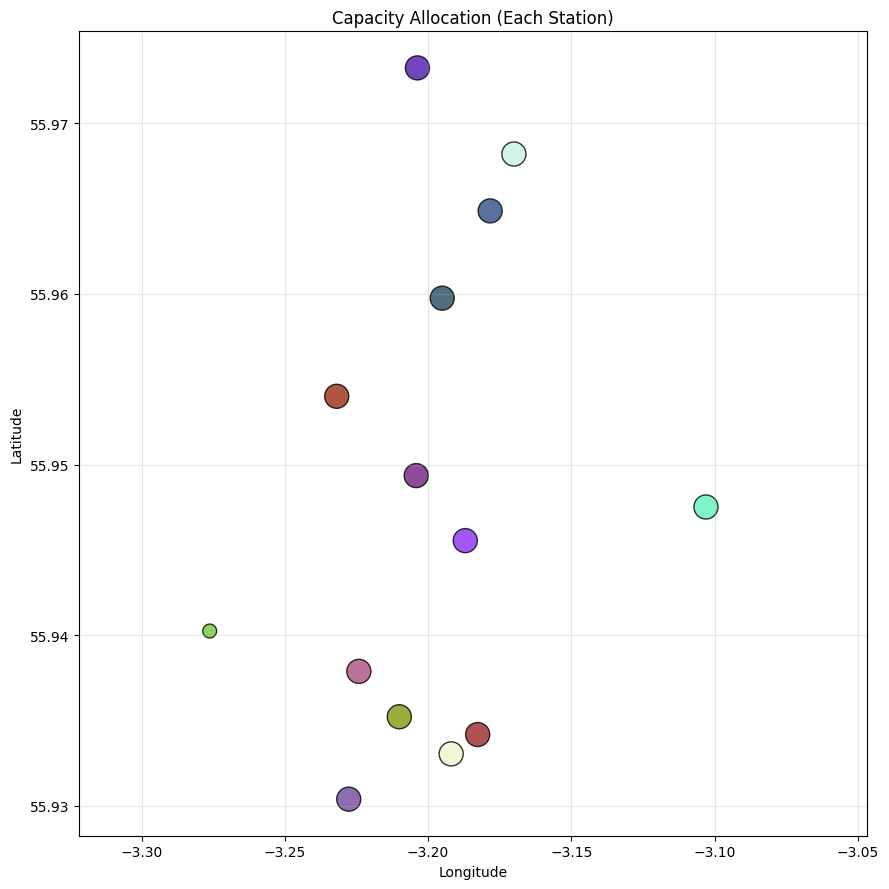

In [31]:
# Visualisation of Site Capacity Distribution
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

cap = pd.read_csv(OUT_DIR / "capacity_results.csv")

plt.figure(figsize=(9, 9))

# Generate a random colour for each site
np.random.seed(42)  # Fixed colours
colors = np.random.rand(len(cap), 3)

plt.scatter(
    cap["lon"], cap["lat"],
    s=cap["docks"] * 2,
    c=colors,
    alpha=0.8,
    edgecolors="black"
)

plt.title("Capacity Allocation (Each Station)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


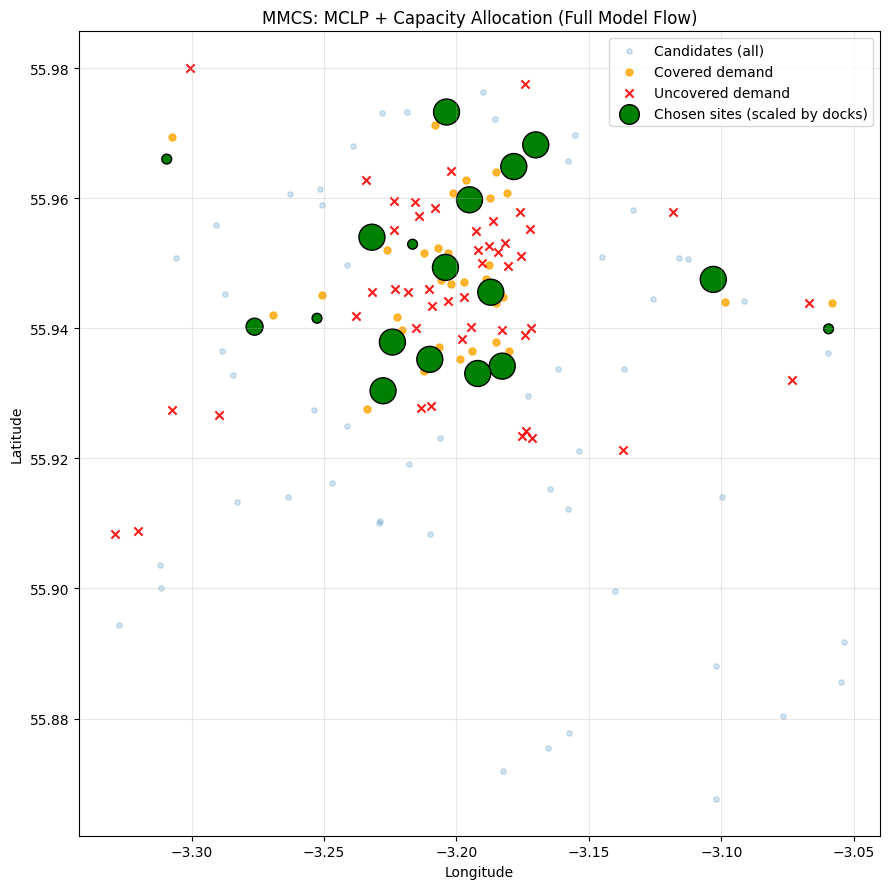

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

cand = pd.read_csv(OUT_DIR / "candidates_with_x.csv")
dem  = pd.read_csv(OUT_DIR / "demand_with_z.csv")
cap  = pd.read_csv(OUT_DIR / "capacity_results.csv")

# merge capacity into candidate data
cand_plot = cand.copy().reset_index().rename(columns={"index": "site_id"})
cand_plot = cand_plot.merge(cap[["site_id", "docks"]], on="site_id", how="left")
cand_plot["docks"] = cand_plot["docks"].fillna(0)

covered = dem["z"] > 0.5
uncovered = dem["z"] <= 0.5

plt.figure(figsize=(9, 9))

# candidates
plt.scatter(cand_plot["lon"], cand_plot["lat"], s=15, alpha=0.20, label="Candidates (all)")

# demand
plt.scatter(dem.loc[covered, "lon"], dem.loc[covered, "lat"], s=25, color="orange", alpha=0.8, label="Covered demand")
plt.scatter(dem.loc[uncovered, "lon"], dem.loc[uncovered, "lat"], s=35, color="red", marker="x", alpha=0.9, label="Uncovered demand")

# chosen stations (size = docks)
chosen = cand_plot["x"] > 0.5
plt.scatter(
    cand_plot.loc[chosen, "lon"],
    cand_plot.loc[chosen, "lat"],
    s=cand_plot.loc[chosen, "docks"] * 2 + 50,   
    color="green", edgecolors="black",
    label="Chosen sites (scaled by docks)"
)

plt.title("MMCS: MCLP + Capacity Allocation (Full Model Flow)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [33]:
# rebalancing
# Calculate station net flow (morning & evening peak hours) from counts-data
# Output: netflow_base / peak heatmap
# ============================================================
# Load counts-data (OD flows)
# ============================================================

import pandas as pd
from pathlib import Path

BASE_DIR = Path(r"C:\Users\Redmi\Desktop\mmcs_project")
COUNTS_DIR = BASE_DIR / "counts-data"   # Change this to a folder

# Load all monthly OD data
dfs = []
for csv_path in COUNTS_DIR.glob("*_counts.csv"):   # Read all files ending with _counts.csv
    df = pd.read_csv(csv_path)
    dfs.append(df)

counts = pd.concat(dfs, ignore_index=True)
print("Counts loaded:", counts.shape)

Counts loaded: (268488, 4)


In [34]:
print(counts.columns)
print(counts.head())


Index(['start_station_id', 'end_station_id', 'hour', 'trip_count'], dtype='object')
   start_station_id  end_station_id  hour  trip_count
0               171             171   9.0           1
1               171             171  10.0           2
2               171             171  11.0           1
3               171             171  12.0           4
4               171             171  13.0           2


In [ ]:
# Compute hourly inflow/outflow for each station
ORIGIN_COL = "start_station_id"
DEST_COL   = "end_station_id"
HOUR_COL   = "hour"
COUNT_COL  = "trip_count"

#inflow（The bike entered a certain station.
# inflow = sum of trip_count grouped by destination + hour
inflow = counts.groupby([DEST_COL, HOUR_COL])[COUNT_COL].sum().reset_index(name="inflow")

outflow = counts.groupby([ORIGIN_COL, HOUR_COL])[COUNT_COL].sum().reset_index(name="outflow")


flow = pd.merge(
    inflow,
    outflow,
    left_on=[DEST_COL, HOUR_COL],
    right_on=[ORIGIN_COL, HOUR_COL],
    how="outer"
)

#Cleaning 
flow["station_id"] = flow[DEST_COL].fillna(flow[ORIGIN_COL])
flow["inflow"] = flow["inflow"].fillna(0)
flow["outflow"] = flow["outflow"].fillna(0)
flow["net_flow"] = flow["inflow"] - flow["outflow"]

flow = flow[["station_id", HOUR_COL, "inflow", "outflow", "net_flow"]]

flow.head()



,station_id,hour,inflow,outflow,net_flow
0,171.0,0.0,20.0,136.0,-116.0
1,171.0,1.0,7.0,64.0,-57.0
2,171.0,2.0,9.0,48.0,-39.0
3,171.0,3.0,3.0,30.0,-27.0
4,171.0,4.0,50.0,15.0,35.0


In [ ]:
# Peak / Off-peak net flow
# Morning peak: 7–10
morning = flow[flow["hour"].between(7, 10)].groupby("station_id")["net_flow"].sum().reset_index()
morning.rename(columns={"net_flow": "morning_net"}, inplace=True)

# Evening peak: 16–19
evening = flow[flow["hour"].between(16, 19)].groupby("station_id")["net_flow"].sum().reset_index()
evening.rename(columns={"net_flow": "evening_net"}, inplace=True)

netflow = pd.merge(morning, evening, on="station_id", how="outer").fillna(0)
netflow.head()


,station_id,morning_net,evening_net
0,171.0,1305.0,-886.0
1,183.0,548.0,-528.0
2,189.0,68.0,-1153.0
3,225.0,599.0,-580.0
4,242.0,2.0,0.0


In [ ]:
# Attach station coordinates  （Using actual station_data）

# Read in site information
station = pd.read_csv(BASE_DIR / "station_data.csv")
print(station.columns)

# If the column names are precisely station_id / lon / lat:
netflow = pd.merge(
    netflow,
    station[["station_id", "lon", "lat"]],
    on="station_id",
    how="left"
)

netflow.head()


Index(['station_id', 'name', 'address', 'rental_uris', 'lat', 'lon',
       'capacity'],
      dtype='object')


,station_id,morning_net,evening_net,lon,lat
0,171.0,1305.0,-886.0,NaN,NaN
1,183.0,548.0,-528.0,-3.191890,55.951981
2,189.0,68.0,-1153.0,-3.190258,55.950109
3,225.0,599.0,-580.0,-3.184179,55.951734
4,242.0,2.0,0.0,NaN,NaN


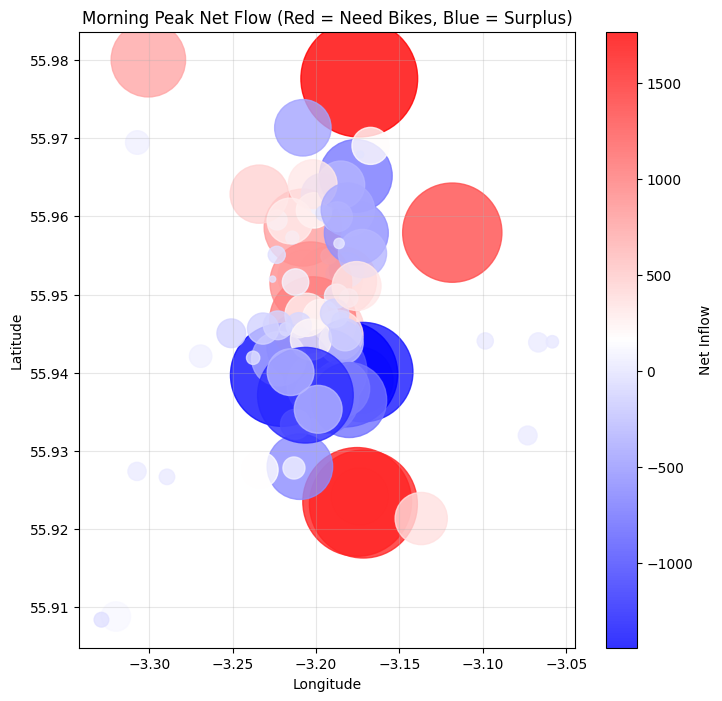

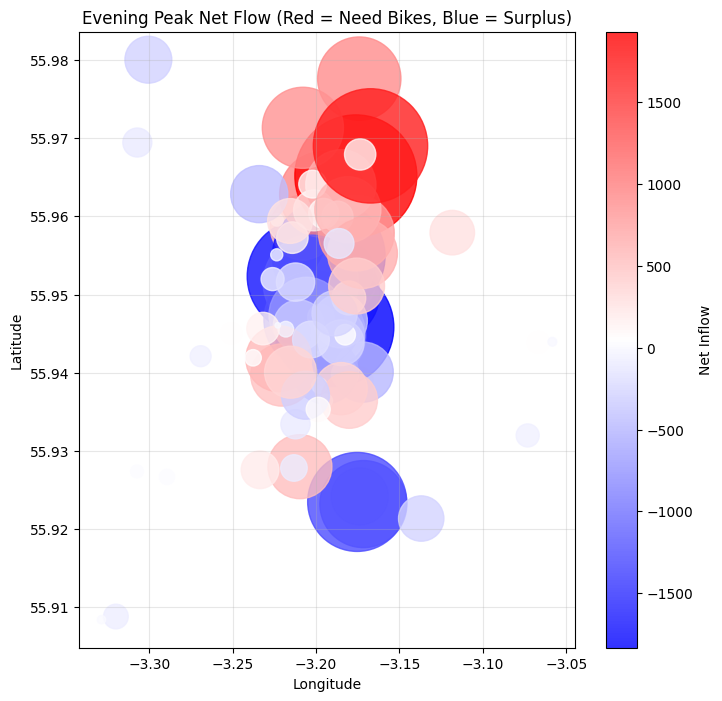

In [ ]:
# Plot: morning net flow (red = need bikes, blue = surplus)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(
    netflow["lon"], netflow["lat"],
    s=abs(netflow["morning_net"])*4,
    c=netflow["morning_net"],
    cmap="bwr", alpha=0.8
)
plt.title("Morning Peak Net Flow (Red = Need Bikes, Blue = Surplus)")
plt.colorbar(label="Net Inflow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8, 8))
plt.scatter(
    netflow["lon"], netflow["lat"],
    s=abs(netflow["evening_net"])*4,
    c=netflow["evening_net"],
    cmap="bwr", alpha=0.8
)
plt.title("Evening Peak Net Flow (Red = Need Bikes, Blue = Surplus)")
plt.colorbar(label="Net Inflow")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)
plt.show()


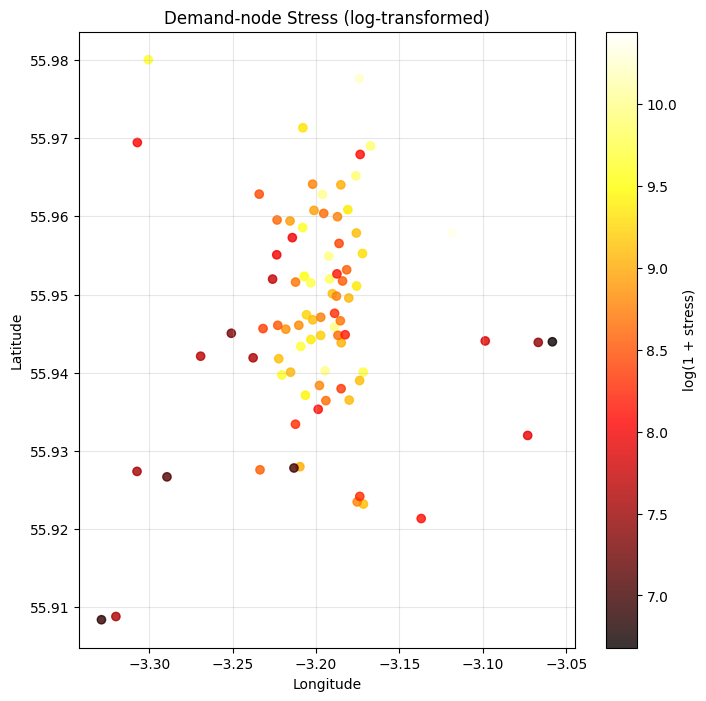

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
BASE = Path(r"C:\Users\Redmi\Desktop\mmcs_project")
OUT_DIR = BASE / "outputs/mclp_run1"
dem = pd.read_csv(OUT_DIR / "demand_with_z.csv")

dem["log_stress"] = np.log1p(dem["weight"])

plt.figure(figsize=(8, 8))
plt.scatter(
    dem["lon"], dem["lat"],
    c=dem["log_stress"],
    cmap="hot",
    alpha=0.8
)
plt.colorbar(label="log(1 + stress)")
plt.title("Demand-node Stress (log-transformed)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(alpha=0.3)
plt.show()


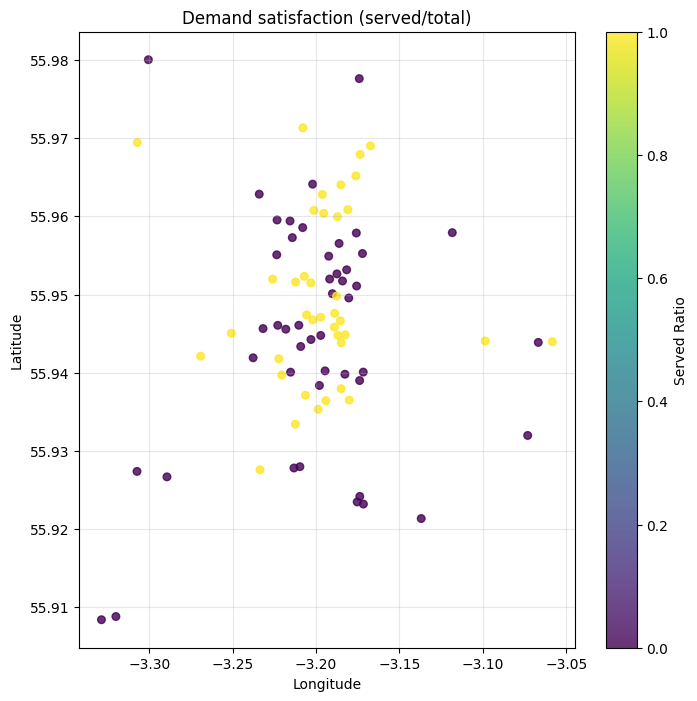

In [ ]:
# Demand Satisfaction Map: u_i / weight_i

dem = pd.read_csv(BASE_DIR / "outputs/mclp_run1/demand_with_z.csv")

dem["satisfaction"] = dem["z"] 

plt.figure(figsize=(8,8))
plt.scatter(
    dem["lon"], dem["lat"],
    s=30,
    c=dem["satisfaction"],
    cmap="viridis",
    alpha=0.8
)
plt.title("Demand satisfaction (served/total)")
plt.colorbar(label="Served Ratio")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
# Final evaluation: budget & capacity reasonableness
# Rationality Assessment of Budget and Berth Allocation

import numpy as np
import pandas as pd

# 1) Remove served/docks from LP 
# Service volume at the demand node level
served_vars = [served[i] for i in dem.index]
served_vals = m.getSolution(served_vars)

dem_eval = dem.copy()
dem_eval["served"] = served_vals
dem_eval["served_ratio"] = dem_eval["served"] / dem_eval["weight"].replace(0, np.nan)

# Overall KPI
total_demand = dem_eval["weight"].sum()
total_served = dem_eval["served"].sum()
overall_ratio = total_served / total_demand if total_demand > 0 else np.nan

num_nodes = len(dem_eval)
num_full = (dem_eval["served_ratio"] >= 0.99).sum()
num_zero = (dem_eval["served_ratio"] <= 1e-6).sum()

print("===== Demand satisfaction KPIs =====")
print(f"Total demand weight       = {total_demand:,.1f}")
print(f"Total served weight       = {total_served:,.1f}")
print(f"Overall served ratio      = {overall_ratio:.3f}")
print(f"Demand nodes (total)      = {num_nodes}")
print(f"Fully served nodes (>=0.99) = {num_full}")
print(f"Unserved nodes (=0)       = {num_zero}")
print()

# 2) Berth and Budget Utilisation 
dock_vars = [docks[s] for s in docks.keys()]
dock_vals = m.getSolution(dock_vars)

total_docks_alloc = sum(dock_vals)
budget_used = DOCK_COST * total_docks_alloc

dock_utilization = total_docks_alloc / TOTAL_DOCKS if TOTAL_DOCKS > 0 else np.nan
budget_utilization = budget_used / COUNCIL_BUDGET if COUNCIL_BUDGET > 0 else np.nan

print("===== Budget & capacity usage =====")
print(f"Total docks allocated     = {total_docks_alloc:,.1f} (limit = {TOTAL_DOCKS})")
print(f"Dock utilization          = {dock_utilization:.3f}")
print(f"Budget used (GBP)         = £{budget_used:,.1f} (limit = £{COUNCIL_BUDGET:,.1f})")
print(f"Budget utilization        = {budget_utilization:.3f}")
print()

#3) Net traffic flow during morning and evening rush hours vs. parking spaces

cap = pd.read_csv(OUT_DIR / "capacity_results.csv")
site_dock = cap[["site_id", "docks"]].rename(columns={"site_id": "station_id"})

# Merge: netflow + docks
# netflow: Requires at least ['station_id','morning_net','evening_net','lon','lat']
site_eval = netflow.merge(site_dock, on="station_id", how="left")

# Missing berths: enter 0 (e.g. certain older stations are not included in the candidate set)
site_eval["docks"] = site_eval["docks"].fillna(0)

# Defining Peak Pressure Indicators: The sum of the absolute values of net traffic flow during morning and evening rush hours.
site_eval["peak_pressure"] = site_eval["morning_net"].abs() + site_eval["evening_net"].abs()

# Berths allocated per unit of pressure (+1 to avoid division by zero)
site_eval["docks_per_pressure"] = site_eval["docks"] / (site_eval["peak_pressure"] + 1)

#  4) Sites marked as "Significantly Underdeveloped / Significantly Overdeveloped" 

# Experience threshold: You may fine-tune this based on the data distribution.
pressure_high = site_eval["peak_pressure"].quantile(0.75)   # Top 25% in terms of high pressure
pressure_low  = site_eval["peak_pressure"].quantile(0.25)   # The bottom 25% in terms of pressure
dock_high     = site_eval["docks"].quantile(0.75)           # Plenty of berths
dock_low      = site_eval["docks"].quantile(0.25)           # Very few berths available

def classify_row(row):
    if row["peak_pressure"] >= pressure_high and row["docks"] <= dock_low:
        return "High pressure & low docks"     # High pressure, low berthing → Prone to pile bursting/hollow piles
    elif row["peak_pressure"] <= pressure_low and row["docks"] >= dock_high:
        return "Low pressure & high docks"     # Low pressure, high berthing → Potential wastage
    else:
        return "Reasonable / medium"

site_eval["capacity_flag"] = site_eval.apply(classify_row, axis=1)


print("===== Summary: capacity flag counts =====")
print(site_eval["capacity_flag"].value_counts())
print()


===== Demand satisfaction KPIs =====
Total demand weight       = 745,054.0
Total served weight       = 315,033.0
Overall served ratio      = 0.423
Demand nodes (total)      = 85
Fully served nodes (>=0.99) = 38
Unserved nodes (=0)       = 47

===== Budget & capacity usage =====
Total docks allocated     = 140.0 (limit = 500)
Dock utilization          = 0.280
Budget used (GBP)         = £700,000.0 (limit = £3,000,000.0)
Budget utilization        = 0.233

===== Summary: capacity flag counts =====
capacity_flag
Reasonable / medium          97
Low pressure & high docks    50
High pressure & low docks    49
Name: count, dtype: int64

